In [ ]:
import pandas as pd

In [ ]:
!wget https://www.dropbox.com/scl/fi/p770ihbcf3wiejl0ere1z/heart.csv?rlkey=zwqzh23lxvdb8eitijrx1k5zn&dl=0

--2023-09-08 13:25:03--  https://www.dropbox.com/scl/fi/p770ihbcf3wiejl0ere1z/heart.csv?rlkey=zwqzh23lxvdb8eitijrx1k5zn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/p770ihbcf3wiejl0ere1z/heart.csv?rlkey=zwqzh23lxvdb8eitijrx1k5zn [following]
--2023-09-08 13:25:04--  https://www.dropbox.com/e/scl/fi/p770ihbcf3wiejl0ere1z/heart.csv?rlkey=zwqzh23lxvdb8eitijrx1k5zn
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb26513d66e9c6fd6fc26324da6.dl.dropboxusercontent.com/cd/0/inline/CDXK9LALssv883lWeb4sNgeZ8dn2xdO6S2QggI0eAJH0hcLt8DdzbcNILw6xuMumGsHBL3cjjGwjTXMdTRN3P4VPtlel-MXegiOwa4MCVt4JZrd6PtcX4-ZRim9ITmwcBI8WjCBJg-wYrAweuoPqoo6T/file# [following]
--2023-09-08 13:25:04--  https://ucb26513d66e9c6fd6fc26324da6.d

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Taking Care of Duplicate Values

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()


In [ ]:
data_dup

False

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X = data.drop('target',axis=1)

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [ ]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [ ]:
# Logistic Regression

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [ ]:
# SVC

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [ ]:
# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [ ]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
import matplotlib.pyplot as plt

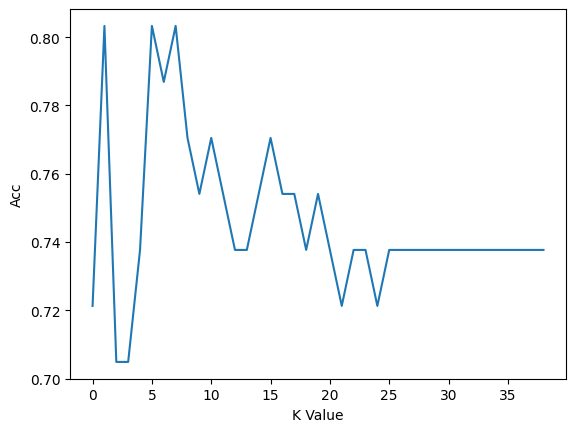

In [ ]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data = data.drop_duplicates()

In [ ]:
X = data.drop('target',axis=1)
y=data['target']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [ ]:
# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4= dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

In [ ]:
#  Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5= rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [ ]:
# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)


0.8032786885245902

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [ ]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,73.770492
4,RF,85.245902
5,GB,80.327869


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


<Axes: xlabel='Models', ylabel='ACC'>

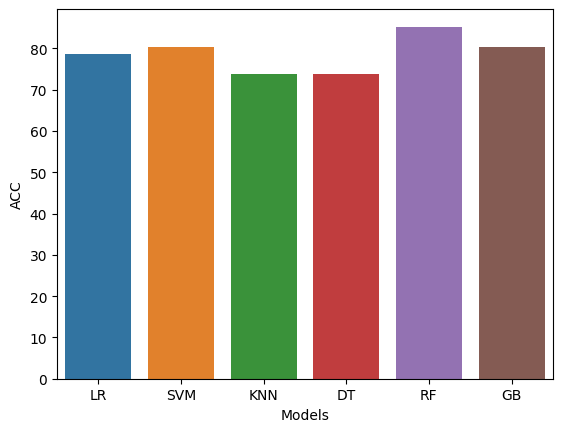

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [ ]:
X=data.drop('target',axis=1)
y=data['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
import pandas as pd


In [ ]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease
